In [ ]:
!pip install tensorflow keras opencv-python matplotlib scikit-learn


In [ ]:
# ================================
# 1. Install Dependencies
# ================================
!pip install -q tensorflow keras opencv-python matplotlib

import os
import zipfile
import matplotlib.pyplot as plt

# ================================
# 2. Download FER2013 Dataset from Kaggle
# ================================
# 👉 Step: Add your Kaggle API key (kaggle.json) to Colab first!
# Upload it manually or use Google Drive

from google.colab import files

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

print("📂 Please upload your kaggle.json file...")
files.upload()

!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# ================================
# 3. Download dataset
# ================================
!kaggle datasets download -d msambare/fer2013

# ================================
# 4. Extract dataset
# ================================
!unzip -q fer2013.zip -d /content/fer2013

# Verify extraction
for root, dirs, files in os.walk("/content/fer2013"):
    print(root, len(files))

# ================================
# 5. Prepare Data Loaders
# ================================
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/fer2013/train"
val_dir = "/content/fer2013/test"

# Data augmentation for training

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)


# Batch Generation And Configuration

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48, 48),
    color_mode="grayscale",
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

# ================================
# 6. Define Model
# ================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ================================
# 7. Train Model
# ================================
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)

# ================================
# 8. Save Model
# ================================
model.save("/content/fer2013_cnn.h5")
print("✅ Model saved as fer2013_cnn.h5")


📂 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.38GB/s]
/content/fer2013 0
/content/fer2013/train 0
/content/fer2013/train/disgust 436
/content/fer2013/train/fear 4097
/content/fer2013/train/neutral 4965
/content/fer2013/train/angry 3995
/content/fer2013/train/surprise 3171
/content/fer2013/train/sad 4830
/content/fer2013/train/happy 7215
/content/fer2013/test 0
/content/fer2013/test/disgust 111
/content/fer2013/test/fear 1024
/content/fer2013/test/neutral 1233
/content/fer2013/test/angry 958
/content/fer2013/test/surprise 831
/content/fer2013/test/sad 1247
/content/fer2013/test/happy 1774
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,015 (2.36 MB)

 Trainable params: 619,015 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 33s 62ms/step - accuracy: 0.2421 - loss: 1.8250 - val_accuracy: 0.2558 - val_loss: 1.7631
Epoch 2/15
237/449 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - accuracy: 0.2669 - loss: 1.7713

KeyboardInterrupt: 

4 classes

📂 Please upload your kaggle.json file...


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
  0% 0.00/60.3M [00:00<?, ?B/s]
100% 60.3M/60.3M [00:00<00:00, 1.10GB/s]
/content/fer2013 0
/content/fer2013/test 0
/content/fer2013/test/neutral 1233
/content/fer2013/test/disgust 111
/content/fer2013/test/happy 1774
/content/fer2013/test/angry 958
/content/fer2013/test/fear 1024
/content/fer2013/test/sad 1247
/content/fer2013/test/surprise 831
/content/fer2013/train 0
/content/fer2013/train/neutral 4965
/content/fer2013/train/disgust 436
/content/fer2013/train/happy 7215
/content/fer2013/train/angry 3995
/content/fer2013/train/fear 4097
/content/fer2013/train/sad 4830
/content/fer2013/train/surprise 3171
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 619,140 (2.36 MB)

 Trainable params: 618,692 (2.36 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.3371 - loss: 1.9719

448/448 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.3371 - loss: 1.9703 - val_accuracy: 0.3602 - val_loss: 2.0707
Epoch 2/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4001 - loss: 1.3312

448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.4001 - loss: 1.3312 - val_accuracy: 0.4364 - val_loss: 1.4104
Epoch 3/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4186 - loss: 1.3061 - val_accuracy: 0.4396 - val_loss: 1.4147
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4284 - loss: 1.2935

448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4284 - loss: 1.2935 - val_accuracy: 0.4453 - val_loss: 1.3273
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.4302 - loss: 1.2890 - val_accuracy: 0.4490 - val_loss: 1.4120
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.4418 - loss: 1.2773 - val_accuracy: 0.4581 - val_loss: 1.3624
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4394 - loss: 1.2823 - val_accuracy: 0.4608 - val_loss: 1.4289
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4491 - loss: 1.2672

448/448 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.4491 - loss: 1.2672 - val_accuracy: 0.4642 - val_loss: 1.2933
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4493 - loss: 1.2665 - val_accuracy: 0.4784 - val_loss: 1.2940
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 38s 85ms/step - accuracy: 0.4573 - loss: 1.2583 - val_accuracy: 0.4701 - val_loss: 1.3827
Epoch 11/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4579 - loss: 1.2565

448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.4579 - loss: 1.2566 - val_accuracy: 0.4831 - val_loss: 1.2839
Epoch 12/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4609 - loss: 1.2478

448/448 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.4609 - loss: 1.2478 - val_accuracy: 0.4886 - val_loss: 1.2152
Epoch 13/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4644 - loss: 1.2418 - val_accuracy: 0.4851 - val_loss: 1.2270
Epoch 14/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - accuracy: 0.4686 - loss: 1.2338 - val_accuracy: 0.4925 - val_loss: 1.2187
Epoch 15/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4720 - loss: 1.2294

448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.4720 - loss: 1.2294 - val_accuracy: 0.5001 - val_loss: 1.2107
Epoch 16/50
445/448 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4722 - loss: 1.2240

448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4722 - loss: 1.2241 - val_accuracy: 0.5053 - val_loss: 1.1660
Epoch 17/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 39s 86ms/step - accuracy: 0.4726 - loss: 1.2279 - val_accuracy: 0.5127 - val_loss: 1.2006
Epoch 18/50
443/448 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4745 - loss: 1.2235

448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.4746 - loss: 1.2235 - val_accuracy: 0.5197 - val_loss: 1.1500
Epoch 19/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4731 - loss: 1.2206

448/448 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - accuracy: 0.4732 - loss: 1.2206 - val_accuracy: 0.5212 - val_loss: 1.1259
Epoch 20/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4798 - loss: 1.2114 - val_accuracy: 0.5207 - val_loss: 1.1418
Epoch 21/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.4862 - loss: 1.2052 - val_accuracy: 0.5022 - val_loss: 1.2179
Epoch 22/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4821 - loss: 1.2019 - val_accuracy: 0.5225 - val_loss: 1.1607
Epoch 23/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4920 - loss: 1.1906

448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.4920 - loss: 1.1906 - val_accuracy: 0.5204 - val_loss: 1.1245
Epoch 24/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.4875 - loss: 1.1848 - val_accuracy: 0.5180 - val_loss: 1.1342
Epoch 25/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.4852 - loss: 1.1850 - val_accuracy: 0.5235 - val_loss: 1.1297
Epoch 26/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.4967 - loss: 1.1709 - val_accuracy: 0.5170 - val_loss: 1.1445
Epoch 27/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5014 - loss: 1.1667

448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5014 - loss: 1.1667 - val_accuracy: 0.5336 - val_loss: 1.0913
Epoch 28/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5023 - loss: 1.1583 - val_accuracy: 0.5249 - val_loss: 1.1213
Epoch 29/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5031 - loss: 1.1608 - val_accuracy: 0.5423 - val_loss: 1.1016
Epoch 30/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.5031 - loss: 1.1532 - val_accuracy: 0.5305 - val_loss: 1.1207
Epoch 31/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5035 - loss: 1.1545

448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5035 - loss: 1.1545 - val_accuracy: 0.5519 - val_loss: 1.0615
Epoch 32/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5087 - loss: 1.1440

448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5087 - loss: 1.1440 - val_accuracy: 0.5527 - val_loss: 1.0565
Epoch 33/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - accuracy: 0.5177 - loss: 1.1330 - val_accuracy: 0.5531 - val_loss: 1.0701
Epoch 34/50
447/448 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5121 - loss: 1.1337

448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.5122 - loss: 1.1337 - val_accuracy: 0.5613 - val_loss: 1.0508
Epoch 35/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5178 - loss: 1.1220 - val_accuracy: 0.5533 - val_loss: 1.0837
Epoch 36/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.5224 - loss: 1.1205 - val_accuracy: 0.5433 - val_loss: 1.0898
Epoch 37/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5263 - loss: 1.1172 - val_accuracy: 0.5530 - val_loss: 1.0660
Epoch 38/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.5198 - loss: 1.1235 - val_accuracy: 0.5523 - val_loss: 1.0736
Epoch 39/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5189 - loss: 1.1171 - val_accuracy: 0.5405 - val_loss: 1.0941


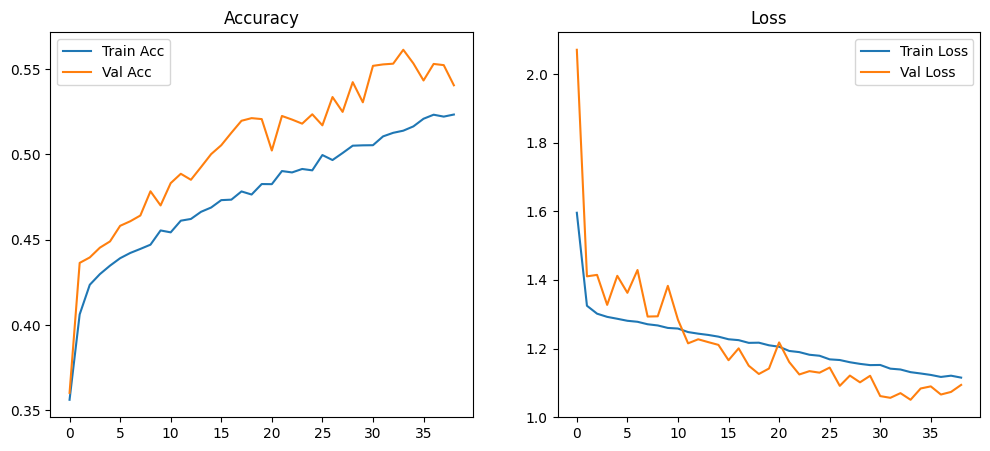

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

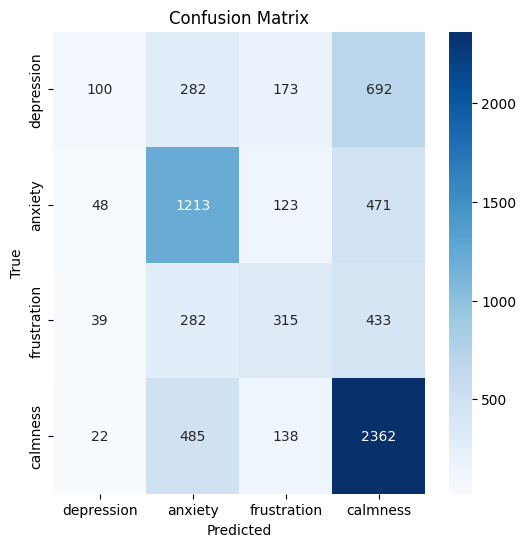

✅ Final model saved at /content/models/face_emotion_4class_final.h5


In [ ]:
# ================================
# 1. Install Dependencies
# ================================
!pip install -q tensorflow keras opencv-python matplotlib

import os
import zipfile
import matplotlib.pyplot as plt

# ================================
# 2. Download FER2013 Dataset from Kaggle
# ================================
# 👉 Step: Add your Kaggle API key (kaggle.json) to Colab first!
# Upload it manually or use Google Drive

from google.colab import files

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

print("📂 Please upload your kaggle.json file...")
files.upload()

!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

# ================================
# 3. Download dataset
# ================================
!kaggle datasets download -d msambare/fer2013

# ================================
# 4. Extract dataset
# ================================
!unzip -q fer2013.zip -d /content/fer2013

# Verify extraction
for root, dirs, files in os.walk("/content/fer2013"):
    print(root, len(files))



# ================================
# 1. Install Dependencies
# ================================
!pip install -q tensorflow keras opencv-python matplotlib scikit-learn

import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ================================
# 2. Emotion Mapping (7 → 4)
# ================================
emotion_map = {
    "angry": "frustration",
    "disgust": "frustration",
    "fear": "anxiety",
    "surprise": "anxiety",
    "sad": "depression",
    "happy": "calmness",
    "neutral": "calmness"
}

FINAL_CLASSES = ["depression", "anxiety", "frustration", "calmness"]

# ================================
# 3. Data Loader with Augmentation
# ================================
img_size = (48, 48)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

def custom_generator(generator):
    while True:
        x_batch, y_batch = next(generator)
        labels_7 = np.argmax(y_batch, axis=1)
        new_labels = []
        for l in labels_7:
            orig_class = list(generator.class_indices.keys())[l]
            new_labels.append(emotion_map[orig_class])
        y_new = [FINAL_CLASSES.index(lbl) for lbl in new_labels]
        y_new = to_categorical(y_new, num_classes=4)
        yield x_batch, y_new

train_gen_raw = train_datagen.flow_from_directory(
    "/content/fer2013/train",
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_gen_raw = test_datagen.flow_from_directory(
    "/content/fer2013/test",
    target_size=img_size,
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

train_gen = custom_generator(train_gen_raw)
test_gen = custom_generator(test_gen_raw)

# ================================
# 4. CNN Model (Improved)
# ================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation="relu", input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(4, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

# ================================
# 5. Training with Callbacks
# ================================
steps_per_epoch = train_gen_raw.samples // batch_size
validation_steps = test_gen_raw.samples // batch_size

callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True),
    ModelCheckpoint("/content/models/best_face_model.h5", save_best_only=True)
]

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=test_gen,
    validation_steps=validation_steps,
    callbacks=callbacks
)

# ================================
# 6. Plot Training Curves
# ================================
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.show()

# ================================
# 7. Evaluation
# ================================
y_true, y_pred = [], []
test_gen_eval = test_datagen.flow_from_directory(
    "/content/fer2013/test",
    target_size=img_size,
    color_mode="grayscale",
    batch_size=1,
    class_mode="categorical",
    shuffle=False
)

for i in range(len(test_gen_eval)):
    x, y = test_gen_eval[i]
    y_true.append(emotion_map[list(test_gen_eval.class_indices.keys())[np.argmax(y)]])
    pred = model.predict(x)
    y_pred.append(FINAL_CLASSES[np.argmax(pred)])

print("\n📊 Classification Report:")
print(classification_report(y_true, y_pred, target_names=FINAL_CLASSES))

# ================================
# 8. Confusion Matrix
# ================================
cm = confusion_matrix(y_true, y_pred, labels=FINAL_CLASSES)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=FINAL_CLASSES, yticklabels=FINAL_CLASSES)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ================================
# 9. Save Final Model
# ================================
model.save("/content/models/face_emotion_4class_final.h5")
print("✅ Final model saved at /content/models/face_emotion_4class_final.h5")
